# Hypothesis
## I am going to be looking into these 7 categories: Lesson Videos, Gradescope Questions, Assignments, Preparing for Quizzes, Office Hours, Tutoring, and Kaki's Review.
### We were asked to rank them from 1-7, 7 being the most effective in helping students understand the content. I am hoping to find out which one(s) ranked the best. 
### I hypothesize the top ranking categories will be Lecture Videos and Office Hours.

In [93]:
%reload_ext autoreload
%autoreload 2

# Defining variables to file path.

In [94]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

## Reading the csv file.

In [95]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows(DATA_FILE_PATH)
columns: dict[str, list[str]] = columnar(data_rows)
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")
print(f"Columns names: {data_rows[0].keys()}")

502 rows
36 columns
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


## Defining variables to the data_rows keys.

In [96]:
videos: str = "ls_effective"
questions: str = "lsqs_effective"
assignments: str = "programming_effective"
quiz: str = "qz_effective"
office: str = "oh_effective"
tutor: str = "tutoring_effective"
kaki: str = "kaki_effective"

## Using columnar function to convert a list of dictionaries to a dictionary of list values.

In [97]:
from data_utils import columnar, count

data_cols: dict[str, list[str]] = columnar(data_rows)

print(f"{len(data_cols.keys())} columns")
print(f"{len(data_cols[kaki])} rows")
print(f"Columns names: {data_cols.keys()}")

count(data_cols[kaki])

36 columns
502 rows
Columns names: dict_keys(['row_number', 'year', 'unc_status', 'comp_major', 'primary_major', 'prereqs', 'prior_exp', 'AP_Principles', 'AP_A', 'other_comp', 'prior_time', 'languages', 'residency', 'on_campus', 'international', 'section', 'lesson_time', 'sync_perf', 'all_sync', 'own_notes', 'own_examples', 'oh_visits', 'ls_effective', 'lsqs_effective', 'programming_effective', 'qz_effective', 'oh_effective', 'tutoring_effective', 'kaki_effective', 'pace', 'difficulty', 'understanding', 'interested', 'valuable', 'grade', 'would_recommend'])


{'4': 67, '7': 78, '': 164, '5': 82, '6': 90, '2': 5, '3': 13, '1': 3}

## Using select function to clean up the data

In [98]:
from data_utils import select, head
from tabulate import tabulate

selected_data: dict[str, list[str]] = select(data_cols, [kaki, tutor, office, quiz, assignments, questions, videos])

tabulate(head(selected_data, 5), selected_data.keys(), "html")

kaki_effective,tutoring_effective,oh_effective,qz_effective,programming_effective,lsqs_effective,ls_effective
4,3,7,4,3,5,3
7,,7,7,3,2,5
7,,7,7,3,2,5
7,,,6,6,6,6
,,,4,6,5,4


## Initializing a variable to each sorted list.

In [99]:
kaki_col: list = sorted(selected_data[kaki])
tutor_col: list= sorted(selected_data[tutor])
office_col: list = sorted(selected_data[office])
quiz_col: list = sorted(selected_data[quiz])
assignments_col: list = sorted(selected_data[assignments])
questions_col: list = sorted(selected_data[questions])
videos_col: list = sorted(selected_data[videos])

## Removing empty values from each list.

In [100]:
kaki_col = [x for x in kaki_col if x]
tutor_col = [x for x in tutor_col if x]
office_col = [x for x in office_col if x]
quiz_col = [x for x in quiz_col if x]
assignments_col = [x for x in assignments_col if x]
questions_col = [x for x in questions_col if x]
videos_col = [x for x in videos_col if x]

## Converting each string type to an int type for every value in each list.

In [101]:
kaki_col = list(map(int, kaki_col))
tutor_col = list(map(int, tutor_col))
office_col = list(map(int, office_col))
quiz_col = list(map(int, questions_col))
assignments_col = list(map(int,assignments_col ))
questions_col = list(map(int, questions_col))
videos_col = list(map(int, videos_col))

## Tabulate the dictionary of cleaned up data.

In [102]:
from tabulate import tabulate
from data_utils import head

effective: dict[str, list[int]] = {"Kaki Review": kaki_col, "Tutoring": tutor_col, "Office Hours": office_col, "Quizes": quiz_col, "Assignments": assignments_col, "Gradescope Questions": questions_col, "Lesson Videos": videos_col}


effective_head = head(effective, 5)
effective_tab = tabulate(effective_head, effective_head.keys(), "html")
effective_tab

Kaki Review,Tutoring,Office Hours,Quizes,Assignments,Gradescope Questions,Lesson Videos
1,1,2,1,1,1,1
1,1,2,1,1,1,1
1,2,2,1,1,1,1
2,2,2,1,1,1,2
2,2,2,1,1,1,2


## Initializing variables to each list count. 

In [103]:
kaki_col_count = count(kaki_col)
tutor_col_count = count(tutor_col)
office_col_count = count(office_col)
quiz_col_count = count(quiz_col)
assignments_col_count = count(assignments_col)
questions_col_count = count(questions_col)
videos_col_count = count(videos_col)

## Using percentages definition to make a list of percentages
### pl = percentage list

In [104]:
from data_utils import percentages

kaki_pl: list[int] = percentages(kaki_col_count, kaki_col)
tutor_pl: list[int] = percentages(tutor_col_count, tutor_col)
quiz_pl: list[int] = percentages(quiz_col_count, quiz_col)
assignments_pl: list[int] = percentages(assignments_col_count, assignments_col)
questions_pl: list[int] = percentages(questions_col_count, questions_col)
videos_pl: list[int] = percentages(videos_col_count, videos_col)
office_pl: list[int] = percentages(office_col_count, office_col)

print(kaki_pl)
print(tutor_pl)
print(quiz_pl)
print(assignments_pl)
print(questions_pl)
print(videos_pl)
print(office_pl)


[1, 1, 4, 20, 24, 27, 23]
[1, 3, 7, 36, 16, 15, 23]
[3, 4, 10, 17, 26, 22, 19]
[1, 1, 4, 10, 19, 25, 41]
[3, 4, 10, 17, 26, 22, 19]
[1, 2, 4, 13, 20, 25, 34]
[0, 2, 4, 13, 16, 20, 45]


## Creating dictionaries out of the percentage lists.
### pd = percentage dictionary

In [105]:
from data_utils import perc

kaki_pd: dict[int, int] = perc(kaki_pl)
tutor_pd: dict[int, int] = perc(tutor_pl)
quiz_pd: dict[int, int] = perc(quiz_pl)
assignments_pd: dict[int, int] = perc(assignments_pl)
questions_pd: dict[int, int] = perc(questions_pl)
videos_pd: dict[int, int] = perc(videos_pl)
office_pd: dict[int, int] = perc(office_pl)

print(kaki_pd)
print(tutor_pd)
print(quiz_pd)
print(assignments_pd)
print(questions_pd)
print(videos_pd)
print(office_pd)

{1: 1, 2: 1, 3: 4, 4: 20, 5: 24, 6: 27, 7: 23}
{1: 1, 2: 3, 3: 7, 4: 36, 5: 16, 6: 15, 7: 23}
{1: 3, 2: 4, 3: 10, 4: 17, 5: 26, 6: 22, 7: 19}
{1: 1, 2: 1, 3: 4, 4: 10, 5: 19, 6: 25, 7: 41}
{1: 3, 2: 4, 3: 10, 4: 17, 5: 26, 6: 22, 7: 19}
{1: 1, 2: 2, 3: 4, 4: 13, 5: 20, 6: 25, 7: 34}
{1: 0, 2: 2, 3: 4, 4: 13, 5: 16, 6: 20, 7: 45}


## Using the useful definition to create categories of low moderate and high effectiveness.
### 1-3 stars = Low effectiveness
### 4-5 stars = Moderately Effective
### 6-7 stars = Highly Effective

In [106]:
from data_utils import useful

print(f"Office Hours: {useful(office_pd)}")
print(f"Video Lectures: {useful(videos_pd)}")
print(f"Gradescope Questions: {useful(questions_pd)}")
print(f"Assignment Questions: {useful(assignments_pd)}")
print(f"Quizes: {useful(quiz_pd)}")
print(f"Tutoring: {useful(tutor_pd)}")
print(f"Kaki Review: {useful(kaki_pd)}")

Office Hours: {'low': 6, 'moderate': 29, 'high': 65}
Video Lectures: {'low': 7, 'moderate': 33, 'high': 59}
Gradescope Questions: {'low': 17, 'moderate': 43, 'high': 41}
Assignment Questions: {'low': 6, 'moderate': 29, 'high': 66}
Quizes: {'low': 17, 'moderate': 43, 'high': 41}
Tutoring: {'low': 11, 'moderate': 52, 'high': 38}
Kaki Review: {'low': 6, 'moderate': 44, 'high': 50}


## Initializing variables to levels of effectiveness.
### lmh = low moderate high

In [107]:
office_lmh = useful(office_pd)
videos_lmh = useful(videos_pd)
questions_lmh = useful(questions_pd)
assignments_lmh = useful(assignments_pd)
quiz_lmh = useful(quiz_pd)
tutor_lmh = useful(tutor_pd)
kaki_lmh = useful(kaki_pd)


## Just Looking at the "Highly Useful" data, I am trying to find out which of the categories have the most votes.

In [108]:
most_useful: dict[str, int] = {"office_lmh": office_lmh["high"], "videos_lmh": videos_lmh["high"], "questions_lmh": questions_lmh["high"], "assignments_lmh": assignments_lmh["high"], "quiz_lmh": quiz_lmh["high"], "tutor_lmh": tutor_lmh["high"], "kaki_lmh": kaki_lmh["high"]}

In [109]:
most_useful1 = sorted(most_useful.items())
most_useful1

[('assignments_lmh', 66),
 ('kaki_lmh', 50),
 ('office_lmh', 65),
 ('questions_lmh', 41),
 ('quiz_lmh', 41),
 ('tutor_lmh', 38),
 ('videos_lmh', 59)]

## Creating a barplot with this data

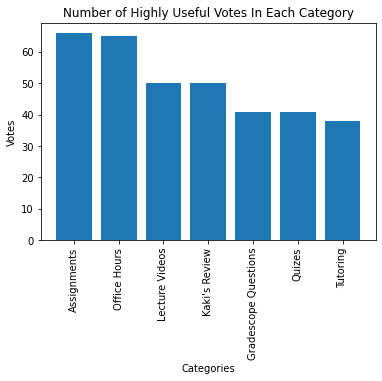

In [110]:
import matplotlib.pyplot as plt
 
# Create dataset
height = [66, 65, 50, 50, 41, 41, 38]
bars = ["Assignments", "Office Hours", "Lecture Videos", "Kaki's Review", "Gradescope Questions", "Quizes", "Tutoring",]
x_pos = np.arange(len(bars))
plt.xticks(rotation=90)
plt.title("Number of Highly Useful Votes In Each Category")
plt.xlabel('Categories')
plt.ylabel('Votes')
 
# Create bars
plt.bar(x_pos, height)
 
# Create names on the x-axis
plt.xticks(x_pos, bars)
 
# Show graphic
plt.show()

## Making a list of dicionaries of the percentages of effectiveness
### perc_ld = percentages list of dictionaries

In [111]:
perc_ld: list[dict[str, str]] = [office_lmh, videos_lmh, questions_lmh, assignments_lmh, quiz_lmh, tutor_lmh, kaki_lmh]
perc_ld[0].keys()
perc_ld

[{'low': 6, 'moderate': 29, 'high': 65},
 {'low': 7, 'moderate': 33, 'high': 59},
 {'low': 17, 'moderate': 43, 'high': 41},
 {'low': 6, 'moderate': 29, 'high': 66},
 {'low': 17, 'moderate': 43, 'high': 41},
 {'low': 11, 'moderate': 52, 'high': 38},
 {'low': 6, 'moderate': 44, 'high': 50}]

## Using the columnar and column_values definitions to create a column oriented table
### perc_col = percentage columns

In [112]:
from data_utils import columnar, column_values

perc_cols: dict[str, list[str]] = columnar(perc_ld)
number = sum(perc_cols["high"])
newnum = round(number/7, 2)
newnum

51.43

## Taking the average of each category to get the overall percentages of high moderate and low effectiveness. 
### This way I can see the overall disposition of the students in all the categories.

In [114]:
from data_utils import pie

high_total: int = pie(perc_cols["high"])
mod_total: int = pie(perc_cols["moderate"])
low_total: int = pie(perc_cols["low"])

print(high_total)
print(mod_total)
print(low_total)


51.0
39.0
10.0


## Creating a pie chart to visualize the overall disposition of students.

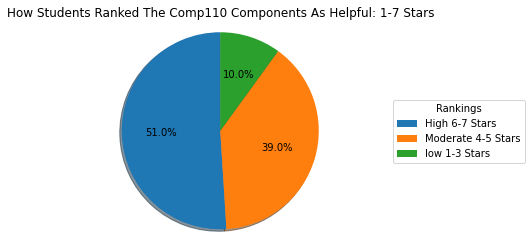

In [117]:
import matplotlib.pyplot as plt

labels = "High 6-7 Stars", "Moderate 4-5 Stars", "low 1-3 Stars"
sizes = [high_total, mod_total, low_total]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("How Students Ranked The Comp110 Components As Helpful: 1-7 Stars")
ax1.legend(labels,
          title="Rankings",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


plt.show()

## Write a definition that takes the highly scored percentages and put a mask and see if majority of the students find this category very effective
### This didn't go with my thought process, so this isn't very helpful, but it is a requirement for creating a mask

In [118]:
from data_utils import more_than

high_eff_mask: list[bool] = more_than(perc_cols["high"])
mod_eff_mask: list[bool] = more_than(perc_cols["moderate"])
low_eff_mask: list[bool] = more_than(perc_cols["low"])

count_high: dict[str, int] = count(high_eff_mask)
count_mod: dict[str, int] = count(mod_eff_mask)
count_low: dict[str, int] = count(low_eff_mask)

print(count_high)
print(count_mod)
print(count_low)


{True: 4, False: 3}
{False: 6, True: 1}
{False: 7}


## Making a graph of all the submissions of each star given for each category

<BarContainer object of 7 artists>

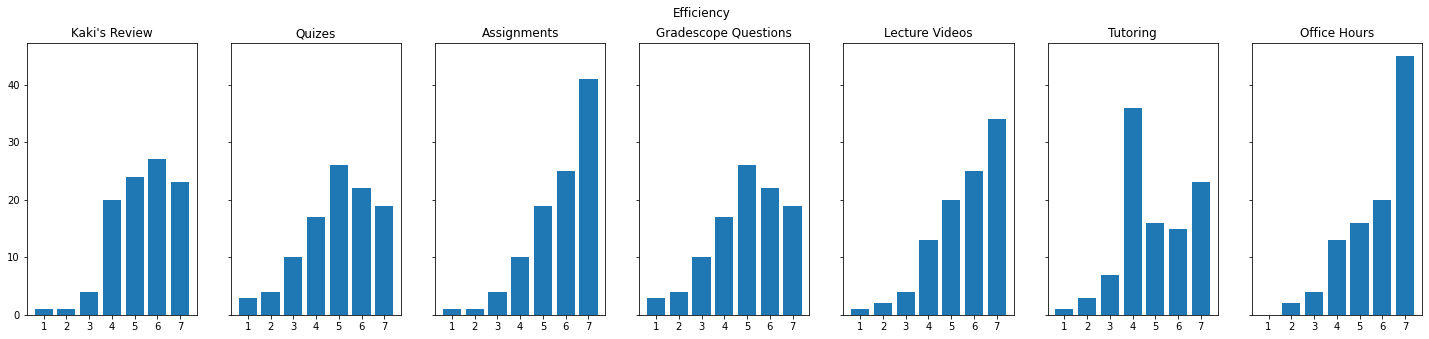

In [119]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 7, figsize=(25, 5), sharex= True, sharey=True)
fig.suptitle("Efficiency")
plt.setp(axes, xticks=[1, 2, 3, 4, 5, 6, 7], xticklabels=[1, 2, 3, 4, 5, 6, 7])

        

axes[0].set_title("Kaki's Review")
axes[0].bar(kaki_pd.keys(), kaki_pd.values())

axes[1].set_title("Quizes")
axes[1].bar(quiz_pd.keys(), quiz_pd.values())

axes[2].set_title("Assignments")
axes[2].bar(assignments_pd.keys(), assignments_pd.values())

axes[3].set_title("Gradescope Questions")
axes[3].bar(questions_pd.keys(), questions_pd.values())

axes[4].set_title("Lecture Videos")
axes[4].bar(videos_pd.keys(), videos_pd.values())

axes[5].set_title("Tutoring")
axes[5].bar(tutor_pd.keys(), tutor_pd.values())

axes[6].set_title("Office Hours")
axes[6].bar(office_pd.keys(), office_pd.values())


# Conclusion
## The top most useful components are Assignments, Office Hours, and Lectures. The Least Helpful is tutoring.
### I did a lot more of preparing the data, I could run a lot more analysis with the cleaned up data, but I hope it is helpful!
### I am not surprised by the results, I would rank the lecture videos and assignments on the top of my list too. I haven't been to office hours; I can't speak to that. 
### I am a little surprised that the tutoring didn't get an overall higher rating.
### Overall, I would conclude that the students are very pleased with the help they are getting in this class. 